In [95]:
import numpy as np

## Worksheet 1
***

1.  Define the global variables: quantum states ${|0\rangle}$ and ${|1\rangle}$  as vectors.

In [96]:
e_0 = np.array([[1],[0]])
e_1 = np.array([[0],[1]])

state_0 = np.array([[1],[0]])
state_1 = np.array([[0],[1]])


2.  Define the global variables: quantum states ${|+\rangle}$ and ${|-\rangle}$  as vectors.

In [97]:
hadamard_gate = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                          [1/np.sqrt(2), -1/np.sqrt(2)]])
state_plus = hadamard_gate @ e_0
state_minus = hadamard_gate @ e_1

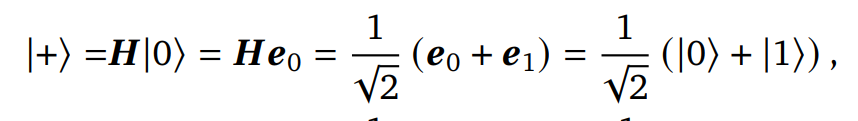

In [98]:
state_plus == (1/np.sqrt(2) * (state_0 + state_1))

array([[ True],
       [ True]])

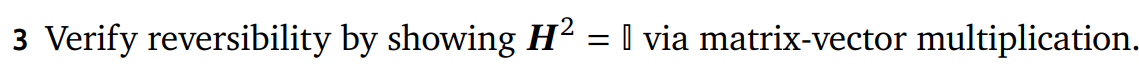

In [99]:
np.round(np.linalg.matrix_power(H, 2), 5)

array([[ 1., -0.],
       [-0.,  1.]])

In [100]:
np.kron(state_plus, e_0) 

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

3. Write a function which checks if a given quantum state is normalized.

In [101]:
def check_if_valid_quantum_state(state):
    normalization = np.abs(state[0]) ** 2 + np.abs(state[1]) ** 2
    return True if np.isclose(normalization, 1) else False

4. Write a function calculating the probability of measuring 0 given a quantum state.

In [102]:
def calculate_prob_o0(state):
    return np.abs(state[0]) ** 2

5. Write a function calculating the probability of measuring 1 given a quantum state.

In [103]:
def calculate_prob_o1(state):
    return 1 - np.abs(state[0]) ** 2

1.  Define the global variables: quantum operation (gates) identity $\mathbb I$,  sign flip ${\mathbf Z}$, bit flip $\mathbf X$, Hadamard $\mathbf H$, as matrices. 

In [104]:
I = np.array([[1,0],[0,1]])
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
H = np.array([[1,1],[1,-1]]) / np.sqrt(2)

2. Write a function which checks if a given matrix is a valid quantum operation.

In [105]:
def check_if_valid_quantum_gate(gate): # checks if this is its own inverse
    normalization = np.linalg.norm(gate @ gate.conj().T - np.eye(2))
    return True if np.isclose(normalization, 0) else False

In [106]:
U = np.array([[1j, -1j], [-1j, 1j]]) / np.sqrt(2)
check_if_valid_quantum_gate(U)

False

In [107]:
U = np.array([
    [0.09957848 - 0.22500271j, -0.87803531 - 0.38839567j],
    [0.20514571 - 0.94940827j,  0.241228   + 0.0484886j ]
])
check_if_valid_quantum_gate(U)

False

In [108]:
U = np.array([
    [0.86114448 - 0.0448945j,  0.31606599 - 0.39562224j],
    [-0.0131393 - 0.50620354j,  0.65941701 + 0.55565685j]
])
check_if_valid_quantum_gate(U)

True

3. Write a function which applies a general quantum gate to a general quantum state. Return the resulting state.

In [109]:
def apply_gate(gate, state):
  return gate @ state

4. Write a function which takes a list of quantum gates (as matrices) and returns a single gate (matrix) which is the composite of the given ones.

In [110]:
def concatenate_gates(gates_list):
  final_gate = np.array([[1,0], [0,1]])
  for gate in gates_list[::-1]:
    final_gate = gate @ final_gate
  return final_gate

Apply one of the single qubit gates you have seen so far to one of the quantum states you have implemented already.

Apply the Hadamard gate to the $|0\rangle$  state and calculate the probability to measure an outcome $0$?
What is the probability of measuring an outcome $1$?
Can you interpret this quantum circuit as a random number generator?
Does it work with another gate? What about a different state?

In [182]:
calculate_prob_o0(I @ state_0), calculate_prob_o1(H @ state_1)

(array([1]), array([0.5]))

In [185]:
I @ H @ state_0

array([[0.70710678],
       [0.70710678]])

## Worksheet 2
***

In [111]:
from scipy.linalg import expm, sinm, cosm


2.  Define the global variables: quantum states ${|\mathrm i_+\rangle}$ and ${|\mathrm i_-\rangle}$ as vectors.

In [112]:
state_i_plus = (1 / np.sqrt(2)) * np.array([1, 1j])
state_i_minus = (1 / np.sqrt(2)) * np.array([1, -1j])
state_i_plus

array([0.70710678+0.j        , 0.        +0.70710678j])

In [113]:
np.kron(state_plus, state_i_plus)

array([[0.5+0.j , 0. +0.5j],
       [0.5+0.j , 0. +0.5j]])

3.  Define the global variables: quantum operation (gates) Pauli $\mathbf Y$ rotation, square root of sign flip ${\mathbf S}$, T-gate $\mathrm T$

In [114]:
Y = np.array([[0, -1j],[1j, 0]])
# Define the S-gate (square root of Z gate)
S = np.array([[1, 0], [0, 1j]])

# Define the T-gate (π/8 gate)
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])

In [115]:
np.kron(T, np.eye(2)) @ np.kron(e_1, e_0)

array([[0.        +0.j        ],
       [0.        +0.j        ],
       [0.70710678+0.70710678j],
       [0.        +0.j        ]])

In [116]:
CNOT_01 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
CNOT_01

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

4.  Define a function that returns a $\mathrm X$-, $\mathrm Y$-,  or $\mathrm Z$-rotation by the rotation angle $\theta$ (it can also be three functions representing $\mathrm R_X$, $\mathrm R_Y$ and $\mathrm R_Z$)

In [117]:
def R_X(theta):
    return expm(-1j * theta / 2 * X)

def R_Y(theta):
    return expm(-1j * theta / 2 * Y)

def R_Z(theta):
    return expm(-1j * theta / 2 * Z)

In [118]:
R_X(0)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [119]:
R_Y(np.pi)# @ R_Y(np.pi/6) @ R_Y(np.pi/3)

array([[ 6.123234e-17+0.j, -1.000000e+00+0.j],
       [ 1.000000e+00+0.j,  6.123234e-17+0.j]])

5.  Define a function checking if matrices are commuting.

In [120]:
def are_commuting(A, B):
    commutator = np.dot(A, B) - np.dot(B, A)
    return np.allclose(commutator, np.zeros_like(commutator))

In [121]:
S.conj().T

array([[1.-0.j, 0.-0.j],
       [0.-0.j, 0.-1.j]])

In [122]:
are_commuting(S @ H @ Z @ H @ S.conj().T, R_Y(-np.pi/2))

True

In [123]:
np.kron(H, S).T == np.kron(S.T, H.T)

array([[ True, False, False,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False,  True]])

1.  Write a function which simulates the action of a student. This function should take a rational number, $k$, and the quantum state received from the previous student as input. The output should be the updated quantum state (which this student will then send forward).

In [124]:
def student_act_on_q_state(q_state, k):
  RY = R_Y(np.pi * k)
  return apply_gate(RY, q_state)

2. Using this function, simulate the whole game with D=3 students for different numbers, $k$, use for example:

In [125]:
state_0 = e_0

In [126]:
k_tot = 493 # Hidden from students
k_list = [k_tot/3, 7 * k_tot /15, k_tot /5] # Each student gets one number.
pass_around_state = state_0 # Start always with zero state.
print(f"Initial state looks like: \n{np.round(pass_around_state,5)}")
for count, k in enumerate(k_list):
  pass_around_state = student_act_on_q_state(pass_around_state, k)
  print(f"{count + 1}. students quantum state looks like: \n{np.round(pass_around_state,5)}")
print(f"True parity of k_tot: {k_tot % 2}")

Initial state looks like: 
[[1]
 [0]]
1. students quantum state looks like: 
[[0.86603+0.j]
 [0.5    +0.j]]
2. students quantum state looks like: 
[[-0.80902+0.j]
 [-0.58779+0.j]]
3. students quantum state looks like: 
[[0.+0.j]
 [1.+0.j]]
True parity of k_tot: 1


In [127]:
U_1 = np.array([[.95105652, -.30901699], [.30901699, .95105652]]) * np.sqrt(6)
check_if_valid_quantum_gate(U_1)

False

In [128]:
np.linalg.norm(np.array([.83666003, .54772256]))

1.000000004266277

In [129]:
def check_normalized(state):
    norm = np.dot(state, state.conj)
    return np.isclose(norm, 1)
    # return np.linalg.norm(state) == 1

In [130]:
U = np.array([[.89100652, -.4539905],
            [.4539905, .89100652]])


In [131]:
def calculate_prob_o0(state):
    return np.abs(state[0]) ** 2

np.round(calculate_prob_o0(U @ state_plus ), 3)

array([0.095])

In [132]:
A = [[1, 1j, 1+3j],[0, 0.5, 1-3.5j]]
B = [[1, 0],[-1j, 5]]
import pandas as pd
pd.DataFrame(np.kron(A, B))

,0,1,2,3,4,5
0,1.0+0.0j,0.0+0.0j,0.0+1.0j,0.0+0.0j,1.0+3.0j,0.0+ 0.0j
1,0.0-1.0j,5.0+0.0j,1.0-0.0j,0.0+5.0j,3.0-1.0j,5.0+15.0j
2,0.0+0.0j,0.0+0.0j,0.5+0.0j,0.0+0.0j,1.0-3.5j,0.0+ 0.0j
3,0.0-0.0j,0.0+0.0j,0.0-0.5j,2.5+0.0j,-3.5-1.0j,5.0-17.5j


In [133]:
# check_normalized(state_plus)

In [134]:
def check_prob_is_zero(state):
    return np.abs(np.inner(e_0.T, state)) ** 2

In [135]:
def check_prob_is_one(state):
    return np.abs(np.inner(e_1.T , state)) ** 2

## Worksheet 3
***

1.  Define a function that takes 2 matrices and outputs its Kronecker product.  Be careful with the ordering!

In [136]:
def calculate_kron_product(A, B):
  m, n = np.shape(A)
  p, q = np.shape(B)

  K = np.empty((p*m, q*n), dtype=complex)
  
  for i in range(m):  # rows
    for j in range(n):  # columns
        K[i*p:(i+1)*p, j*q:(j+1)*q] = A[i, j] * B

  return K

2.  Use the same function to produce a quantum state of two qubits. 

In [137]:
calculate_kron_product(state_0, state_0)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

1.  Define a function which takes 2 quantum states and outputs the Kronecker product join quantum state.

In [138]:
def create_2_qubits_state(psi1, psi2):
  return calculate_kron_product(psi1, psi2)


2.  Define a function which takes 2 unitary matrices acting on separate quantum states and outputs a single unitary matrix acting on the joined space. Be careful with dimensions!

In [139]:
# testing it with the example of the lecture notes, eq.(4.4):
result = 1/np.sqrt(2)*np.array([[1, 0, 1, 0],
                  [0, -1, 0, -1],
                  [1, 0, -1, 0],
                  [0, -1, 0, 1]])

def create_q_gate_on_2_qubits(A, B):
  return calculate_kron_product(A, B)
  #return np.kron(A, B)
 
np.isclose(create_q_gate_on_2_qubits(H, Z), result)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

3. Define the CNOT gate.

In [140]:

CNOT_01 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])


1.  Define a function that takes a 4x1 vector representing a quantum state on 2 qubits and returns the probability to measure 00, 01, 10 and 11. 

In [141]:

def calculate_measurement_probabilitites(psi):
  return [np.abs(psi[0]) ** 2, np.abs(psi[1]) ** 2, np.abs(psi[2]) ** 2, np.abs(psi[3]) ** 2]
  
# check with for example:
calculate_measurement_probabilitites(psi=np.kron(state_plus, state_plus))


[array([0.25]), array([0.25]), array([0.25]), array([0.25])]

1.  Define a function that takes a 4x1 vector representing a quantum state on 2 qubits and returns the probability to measure 00, 01, 10 and 11. 

In [142]:
def calculate_measurement_probabilitites(psi):
  return [np.abs(psi[0]) ** 2, np.abs(psi[1]) ** 2, np.abs(psi[2]) ** 2, np.abs(psi[3]) ** 2]
  
# check with for example:
calculate_measurement_probabilitites(psi=np.kron(state_plus, state_plus))

[array([0.25]), array([0.25]), array([0.25]), array([0.25])]

## Worksheet 4
***

1.   Define the global variables: 2-qubit bell states ${|\psi_{\text{Bell}}(0,0)\rangle}$, ${|\psi_{\text{Bell}}(0,1)\rangle}$, ${|\psi_{\text{Bell}}(1,0)\rangle}$, and ${|\psi_{\text{Bell}}(1,1)\rangle}$  as vectors.

In [143]:
create_2_qubits_state(state_0, state_0)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [144]:
bell_state_00 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_0, state_0)
bell_state_01 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_0, state_1)
bell_state_10 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_1, state_0)
bell_state_11 = CNOT_01 @ create_q_gate_on_2_qubits(H, I) @ create_2_qubits_state(state_1, state_1)

2.  Define the global variable: 2-qubit Bell basis measurement gate

In [145]:
Bell_Measurement_Gate = create_q_gate_on_2_qubits(H, I) @ CNOT_01

3.  Define a function that takes in a ket vector $|\psi\rangle$ and returns its dual version (bra) $\langle\psi|$. Define another function that turns a dual vector (bra) into its ket version.

In [146]:
def to_dual(ket):
  return np.array(ket).flatten().conj()

def to_ket(bra):
  return np.array(bra)[...,None].conj()

to_dual(np.array([[1], [0]])), to_ket(np.array([1, 0]))

(array([1, 0]),
 array([[1],
        [0]]))

Write a function that checks if a given set of vectors forms an orthonormal basis.

In [147]:
def check_if_orthonormal(vector_list):
  for count1, v1 in enumerate(vector_list):
    for count2, v2 in enumerate(vector_list):
      overlap = to_dual(v1) @ v2
      if np.isclose(overlap, 0) and count1 != count2:
        continue
      elif np.isclose(overlap, 1) and count1 == count2:
        continue
      else:
        return False
  return True

1.  We need an entangled state. In the protocol, Charlie provides this state. In our version, this is the first Bell state. Charlie sends one qubit to Alice and the other one to Bob. We cannot simulate that, so a function that returns the initial state should be enough. 

In [171]:
def init_entangled_state():
  return bell_state_00

2. Alice chooses which 2 bits to send and applies the respective quantum operations on her part of the entangled state. Then she sends her qubit to Bob.

In [172]:
def message_encoding(initial_state, sending_bits:str):
  gate = np.linalg.matrix_power(Z, int(sending_bits[0])) @ np.linalg.matrix_power(X, int(sending_bits[1]))
  return create_q_gate_on_2_qubits(gate, I) @ initial_state

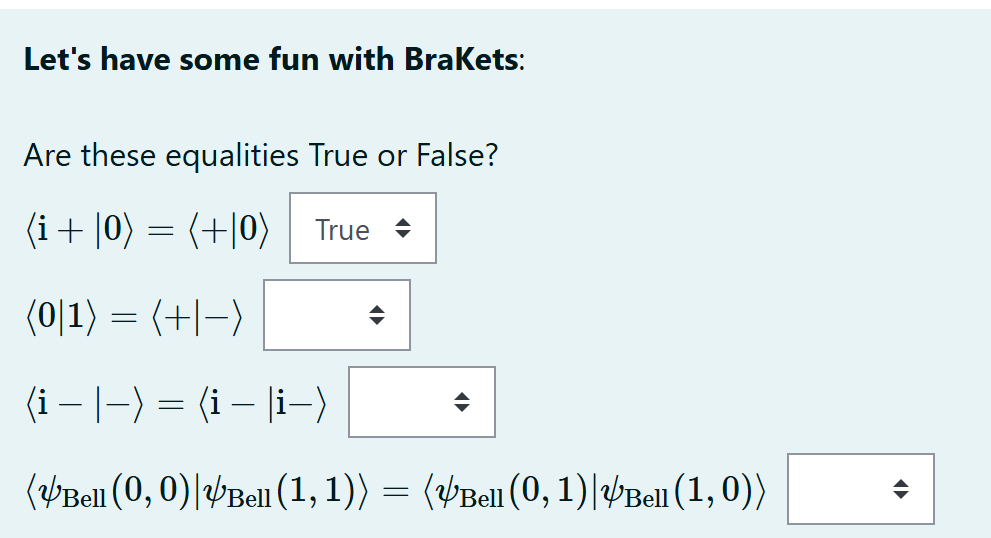

In [148]:
(state_i_plus @ state_0) == (to_dual(state_plus) @ state_0)

array([ True])

In [149]:
(to_dual(state_0) @ state_1) == (to_dual(state_plus) @ state_minus)

array([ True])

In [150]:
(state_i_minus @ state_minus) == state_i_minus @ to_ket(state_i_minus)

array([False])

In [151]:
(to_dual(bell_state_00) @ bell_state_11) == (to_dual(bell_state_01) @ bell_state_10)  

array([ True])

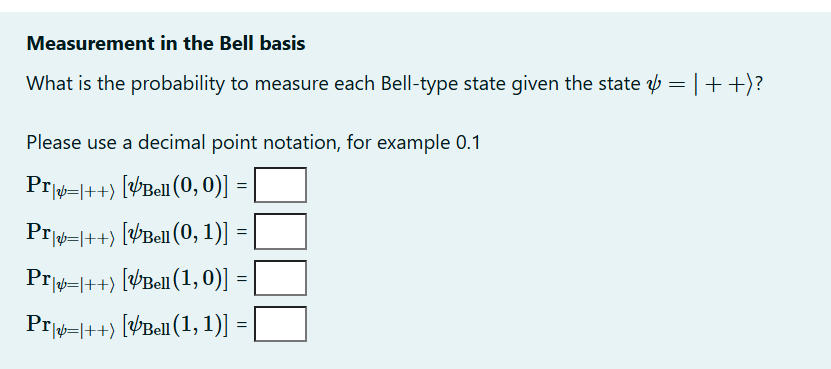

In [152]:
(to_dual(np.kron(state_0, state_0)) @ bell_state_00) ** 2

array([0.5+0.j])

In [153]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_00)) ** 2

array([0.5])

In [154]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_01)) ** 2

array([0.5])

In [155]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_10)) ** 2

array([0.])

In [156]:
(np.abs(to_dual(np.kron(state_plus, state_plus)) @ bell_state_11)) ** 2

array([0.])

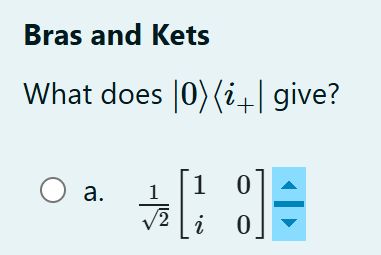

In [157]:
np.outer(state_0, to_ket(state_i_plus))

array([[0.70710678+0.j        , 0.        -0.70710678j],
       [0.        +0.j        , 0.        +0.j        ]])

In [158]:
state_plus 

array([[0.70710678],
       [0.70710678]])

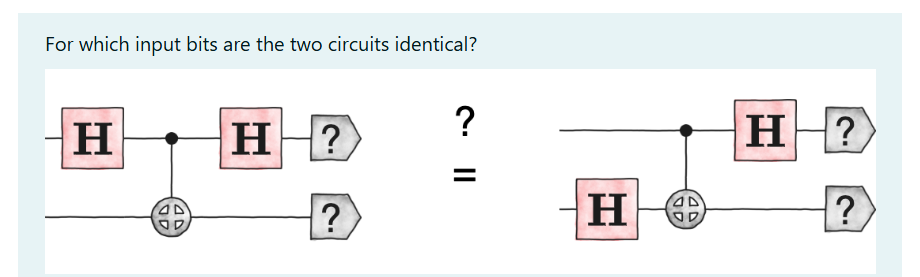

In [159]:
np.kron(H, I) @ bell_state_00 == np.kron(I, H) @ bell_state_00

array([[ True],
       [ True],
       [ True],
       [ True]])

In [160]:
np.kron(H, I) @ bell_state_01 == np.kron(I, H) @ bell_state_01

array([[ True],
       [False],
       [False],
       [ True]])

In [161]:
np.kron(H, I) @ bell_state_10 == np.kron(I, H) @ bell_state_10

array([[ True],
       [False],
       [False],
       [ True]])

In [162]:
np.kron(H, I) @ bell_state_11 == np.kron(I, H) @ bell_state_11

array([[False],
       [False],
       [False],
       [False]])

In [163]:
np.kron(H, I) @ bell_state_01, np.kron(H, I) @ bell_state_10, np.kron(H, I) @ bell_state_11

(array([[ 0.5+0.j],
        [ 0.5+0.j],
        [-0.5+0.j],
        [ 0.5+0.j]]),
 array([[ 0.5+0.j],
        [-0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j]]),
 array([[-0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j],
        [ 0.5+0.j]]))

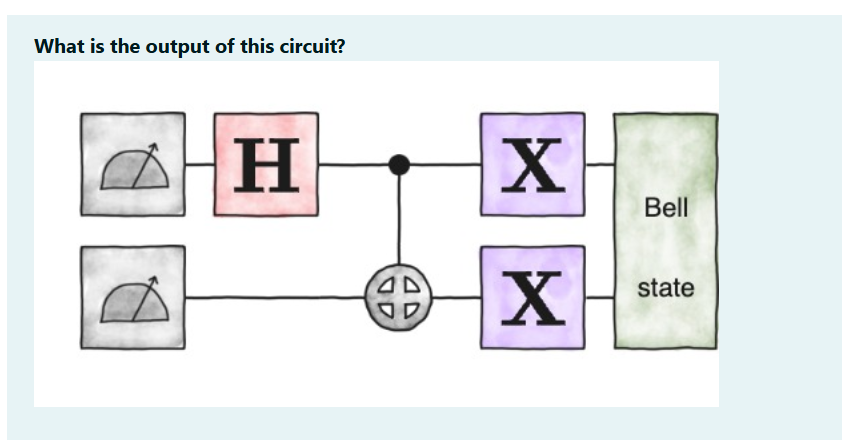

In [164]:
np.kron(H, I) @ CNOT_01 @ np.kron(X, X) @ bell_state_00

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

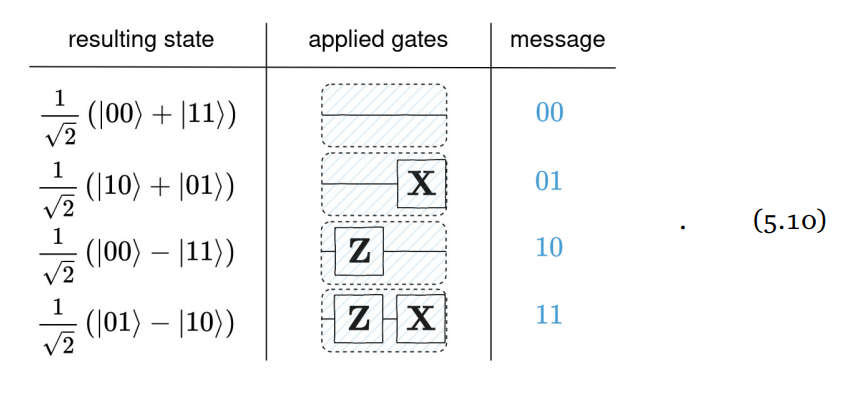

In [166]:
message_00_enc = (np.kron(state_0, state_0) + np.kron(state_1, state_1)) / np.sqrt(2)
message_01_enc = (np.kron(state_1, state_0) + np.kron(state_0, state_1)) / np.sqrt(2)
message_10_enc = (np.kron(state_0, state_0) - np.kron(state_1, state_1)) / np.sqrt(2)
message_11_enc = (np.kron(state_0, state_1) - np.kron(state_1, state_0)) / np.sqrt(2)
resulting_states = [message_00_enc, message_01_enc, message_10_enc, message_11_enc]

In [167]:
check_if_orthonormal(resulting_states), to_dual(message_00_enc) @ message_01_enc

(True, array([0.]))

In [168]:
ALL_2B_OUTCOMES = np.array([['00'], ['01'], ['10'], ['11']])

def reverse_entanglement(received_state): #1
  return Bell_Measurement_Gate @ received_state

def readout(final_qstate): #2
  return calculate_measurement_probabilitites(final_qstate)

def decode(probs): #3
  mask_outcome = np.isclose(probs, 1)
  return ALL_2B_OUTCOMES[mask_outcome]

In [169]:
psi1 = [[1 / np.sqrt(2)], [0], [0], [-1 / np.sqrt(2)]]
psi2 = [[0], [1 / np.sqrt(2)], [-1 / np.sqrt(2)], [0]]
psi3 = [[np.e ** (-1j * np.pi / 3) / np.sqrt(2)], [0], [0], [np.e ** (-1j * np.pi / 3) / np.sqrt(2)]]
psi4 = [[1 / 2 + 1j / 2], [0], [0], [1 / 2 - 1j / 2]]
psi5 = [[1/2], [-1j/2], [-1j/2], [1/2]]
psi6 = [[1 / 2 + 1j / 2], [0], [0], [1 / 2 + 1j / 2]]
psi7 = [[1 / np.sqrt(2)], [0], [0], [np.e ** (-1j * np.pi) / np.sqrt(2)]]
all_psis = [psi1, psi2, psi3, psi4, psi5, psi6, psi7]

for psi in all_psis:
    reversed_state = reverse_entanglement(psi)
    readouts = readout(reversed_state)
    decodes_as = decode(readouts)
    print(psi, decodes_as)


[[0.7071067811865475], [0], [0], [-0.7071067811865475]] ['10']
[[0], [0.7071067811865475], [-0.7071067811865475], [0]] ['11']
[[(0.35355339059327384-0.6123724356957945j)], [0], [0], [(0.35355339059327384-0.6123724356957945j)]] ['00']
[[(0.5+0.5j)], [0], [0], [(0.5-0.5j)]] []
[[0.5], [(-0-0.5j)], [(-0-0.5j)], [0.5]] []
[[(0.5+0.5j)], [0], [0], [(0.5+0.5j)]] ['00']
[[0.7071067811865475], [0], [0], [(-0.7071067811865475-8.659560562354933e-17j)]] ['10']


4. Put the functions all together to simulate sending all 4 different 2-bit combinations. 

In [173]:
for bits_to_send in ['00', '01', '10', '11']:
  print(f"Bits to send: {bits_to_send} ...")
  initial_state = init_entangled_state() # 1. step
  after_Alice_state = message_encoding(initial_state, bits_to_send) # 2. step
  after_Bob_state = reverse_entanglement(after_Alice_state) # 3.1 step
  probs = readout(after_Bob_state) # 3.2 step
  received_message = decode(probs) # 3.3 step
  print(f"... Received message: {received_message}")

Bits to send: 00 ...
... Received message: ['00']
Bits to send: 01 ...
... Received message: ['01']
Bits to send: 10 ...
... Received message: ['10']
Bits to send: 11 ...
... Received message: ['11']


## Worksheet 5
***

1.  Write a function which takes the probability of losing and outputs a binary outcome based on this probability. 

In [198]:

def draw_straw(prob):
    outcome = np.random.choice(a=[1, 0], size=1, p=[prob, 1-prob])
    return outcome

# prob = 1/5
# np.random.choice(a=[1, 0], size=1, p=[prob, 1-prob])

In [199]:
def simulate_drawing_straws(n):
  outcomes = np.zeros(n, dtype=int) # record the outcomes for every person; everyone wins by default

  prob_to_lose = 1/n  # this is the initial probability to lose, i.e. to draw the short straw

  for person in range(n):
    outcome = draw_straw(prob_to_lose)
    outcomes[person] = outcome # record the outcome
    if outcome == 0:  # wins, long straw
      prob_to_lose = 1/(n-(person+1))  # the probability changes because it's conditional.
    else:  # once someone loses, the rest win by default
      break
  return outcomes

In [204]:
simulate_drawing_straws(5)

C:\Users\Micha\AppData\Local\Temp\ipykernel_10604\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


array([0, 0, 0, 1, 0])

In [205]:
n = 5
n_simulations = 100
total_outcomes = np.zeros(n, dtype=int)
for _ in range(n_simulations):
  total_outcomes += simulate_drawing_straws(n)

total_outcomes, total_outcomes / n_simulations - 1/n

C:\Users\Micha\AppData\Local\Temp\ipykernel_10604\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


(array([20, 25, 17, 20, 18]), array([ 0.  ,  0.05, -0.03,  0.  , -0.02]))

In [206]:
n = 5
n_simulations = 10000
total_outcomes = np.zeros(n, dtype=int)
for _ in range(n_simulations):
  total_outcomes += simulate_drawing_straws(n)

total_outcomes, total_outcomes / n_simulations - 1/n

C:\Users\Micha\AppData\Local\Temp\ipykernel_10604\2012761837.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outcomes[person] = outcome # record the outcome


(array([1985, 2009, 2029, 2059, 1918]),
 array([-0.0015,  0.0009,  0.0029,  0.0059, -0.0082]))

1.  Implement a function to extract the marginal probability to measure $0$ on the first qubit given a $2$-qubit state vector

In [207]:
def compute_2q_marginal_prob_for_o0(phi):
  return np.sum((np.abs(phi[0]) ** 2, np.abs(phi[1]) ** 2))

2.  Write a function which returns a single shot measurement outcome given the probability for measuring $0$.

In [219]:
def single_shot_from_p0(p_0):
  rng = np.random.default_rng()
  r = rng.uniform(0, 1)
  return 0 if r <= p_0 else 1

3.  Write a function that collapses the $2$-qubit state vector into a $1$-qubit state vector, based on the outcome shot $o_0$ and the respective probability.

In [220]:
np.kron(to_dual(state_0), I), to_dual(state_0)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0]]),
 array([1, 0]))

In [221]:
def collaps_2q_state(phi, o_0, p_0):
  if o_0 == 0:
    return np.kron(to_dual(state_0), I) @ phi / np.sqrt(p_0)
  else:
    return np.kron(to_dual(state_1), I) @ phi / np.sqrt(1 - p_0)

1. Write a function that takes a single qubit quantum state and returns the $2$-qubit entangled quantum state $|\varphi_2\rangle$ (see lecture notes) from the diagram, so the state right after the second CNOT gate.

In [222]:
CNOT_10 = np.kron(H, H) @ CNOT_01 @ np.kron(H, H)
pd.DataFrame(np.round(CNOT_10, 1))

,0,1,2,3
0,1.0,-0.0,-0.0,0.0
1,0.0,-0.0,-0.0,1.0
2,-0.0,0.0,1.0,-0.0
3,-0.0,1.0,0.0,-0.0


In [223]:

def init_state(psi):
  g1 = create_q_gate_on_2_qubits(H, I)
  g2 = create_q_gate_on_2_qubits(T, I)
  g3 = CNOT_10
  g4 = CNOT_01
  return g4 @ g3 @ g2 @ g1 @ create_2_qubits_state(state_0, psi)

2. Combine that with the functions from above (Instruction 1: 1.-3.) to implement the whole T-gate teleportation subroutine. This function should intake a state $|\psi\rangle$ and return $\mathbf T|\psi\rangle$ without applying the T-gate directly to this state.

In [224]:
# needs psi as an input.
psi = state_0
phi = init_state(psi) 
p_0 = compute_2q_marginal_prob_for_o0(phi)
o_0 = single_shot_from_p0(p_0)
phi_collapsed = collaps_2q_state(phi, o_0, p_0)
Tpsi = np.linalg.matrix_power(X @ S, o_0) @ phi_collapsed

In [225]:
Tpsi

array([[-7.07106781e-01+7.07106781e-01j],
       [-3.61018765e-33+8.71576399e-33j]])